In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
credit_df = pd.read_csv("credit.csv")

In [3]:
credit_df

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes


In [4]:
credit_df.shape

(1000, 17)

In [5]:
credit_df.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [6]:
for col in credit_df.select_dtypes(include='object').columns:
    print('count_values of {}\n is {} '.format(col,credit_df[col].value_counts()))

count_values of checking_balance
 is unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64 
count_values of credit_history
 is good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64 
count_values of purpose
 is furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64 
count_values of savings_balance
 is < 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64 
count_values of employment_duration
 is 1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64 
count_values of other_credit
 is none     814
bank     139
store     47
Name: other_credit, dtype: int64 
count_values

In [7]:
credit_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
checking_balance,1000,4,unknown,394,NaN,NaN,NaN,NaN,NaN,NaN,NaN
months_loan_duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
credit_history,1000,5,good,530,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purpose,1000,6,furniture/appliances,473,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
savings_balance,1000,5,< 100 DM,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_duration,1000,5,1 - 4 years,339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
percent_of_income,1000.0,NaN,NaN,NaN,2.973,1.118715,1.0,2.0,3.0,4.0,4.0
years_at_residence,1000.0,NaN,NaN,NaN,2.845,1.103718,1.0,2.0,3.0,4.0,4.0
age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0


In [8]:
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in credit_df.columns: 
    if credit_df[feature].dtype == 'object': 
        credit_df[feature] = pd.Categorical(credit_df[feature]).codes

In [9]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   checking_balance      1000 non-null   int8 
 1   months_loan_duration  1000 non-null   int64
 2   credit_history        1000 non-null   int8 
 3   purpose               1000 non-null   int8 
 4   amount                1000 non-null   int64
 5   savings_balance       1000 non-null   int8 
 6   employment_duration   1000 non-null   int8 
 7   percent_of_income     1000 non-null   int64
 8   years_at_residence    1000 non-null   int64
 9   age                   1000 non-null   int64
 10  other_credit          1000 non-null   int8 
 11  housing               1000 non-null   int8 
 12  existing_loans_count  1000 non-null   int64
 13  job                   1000 non-null   int8 
 14  dependents            1000 non-null   int64
 15  phone                 1000 non-null   int8 
 16  default

In [10]:
credit_df

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,1,6,0,4,1169,4,3,4,4,67,1,1,2,1,1,1,0
1,0,48,1,4,5951,2,0,2,2,22,1,1,1,1,1,0,1
2,3,12,0,3,2096,2,1,2,3,49,1,1,1,3,2,0,0
3,1,42,1,4,7882,2,1,2,4,45,1,0,1,1,2,0,0
4,1,24,3,1,4870,2,0,3,4,53,1,0,2,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,1,4,1736,2,1,3,4,31,1,1,1,3,1,0,0
996,1,30,1,1,3857,2,0,4,4,40,1,1,1,0,1,1,0
997,3,12,1,4,804,2,3,4,4,38,1,1,1,1,1,0,0
998,1,45,1,4,1845,2,0,4,4,23,1,0,1,1,1,1,1


In [11]:
# capture the target column ("default") into separate vectors for training set and test set

X = credit_df.drop("default" , axis=1)

y = credit_df.pop("default")




In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)


In [14]:
dt_model = DecisionTreeClassifier()

In [15]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [16]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('d:\credit_tree.dot','w') ### r'C:\Users\parik\Documents\IBM\Machine_Learning\sunday\dt_rf'
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()


In [17]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


                           Imp
checking_balance      0.139521
months_loan_duration  0.101337
credit_history        0.049175
purpose               0.054374
amount                0.181670
savings_balance       0.070805
employment_duration   0.063537
percent_of_income     0.049640
years_at_residence    0.034757
age                   0.141235
other_credit          0.021853
housing               0.013021
existing_loans_count  0.016666
job                   0.023460
dependents            0.013349
phone                 0.025600


In [18]:
dt_model.feature_importances_

array([0.13952053, 0.10133692, 0.049175  , 0.05437413, 0.1816697 ,
       0.07080493, 0.06353744, 0.04964047, 0.03475703, 0.14123531,
       0.02185306, 0.01302109, 0.01666637, 0.02345989, 0.01334856,
       0.02559956])

In [19]:
y_predict_test = dt_model.predict(X_test)
y_predict_train = dt_model.predict(X_train)

In [39]:
X_train.head(2)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone
731,1,24,1,4,1987,2,0,2,4,21,1,2,1,3,2,0
716,3,30,0,4,3077,4,3,3,2,40,1,1,2,1,2,1


In [41]:
train_labels.head(2)   ###  y_train (actuall)

731    1
716    0
Name: default, dtype: int8

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(classification_report(train_labels, y_predict_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       486
           1       1.00      1.00      1.00       214

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



In [22]:
print(classification_report(test_labels, y_predict_test))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79       214
           1       0.46      0.42      0.44        86

    accuracy                           0.69       300
   macro avg       0.61      0.61      0.61       300
weighted avg       0.68      0.69      0.69       300



#  Regularising the Decision Tree (Hyperparameter Tunning)

In [24]:
params = { 'max_depth' : [7,8,9,10,11],
           'min_sample_leaf':[10,15,20,25,30],
          'max_features' : [5,7,9,11,12]
    }

reg_dt_model = DecisionTreeClassifier(max_depth = 7,min_samples_leaf=20,min_samples_split=60)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=20, min_samples_split=60)

In [46]:
X_train.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone'],
      dtype='object')

In [47]:
reg_dt_model.feature_importances_

array([0.38558928, 0.1671264 , 0.08311998, 0.08429692, 0.06014172,
       0.09155509, 0.0229467 , 0.01069789, 0.        , 0.0596255 ,
       0.        , 0.        , 0.01487069, 0.02002983, 0.        ,
       0.        ])

In [45]:
credit_tree_regularized = open('d:\credit_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= credit_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

credit_tree_regularized.close()

print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


                           Imp
checking_balance      0.385589
months_loan_duration  0.167126
credit_history        0.083120
purpose               0.084297
amount                0.060142
savings_balance       0.091555
employment_duration   0.022947
percent_of_income     0.010698
years_at_residence    0.000000
age                   0.059626
other_credit          0.000000
housing               0.000000
existing_loans_count  0.014871
job                   0.020030
dependents            0.000000
phone                 0.000000


In [26]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85       486
           1       0.75      0.40      0.52       214

    accuracy                           0.77       700
   macro avg       0.76      0.67      0.69       700
weighted avg       0.77      0.77      0.75       700



In [32]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       214
           1       0.57      0.36      0.44        86

    accuracy                           0.74       300
   macro avg       0.68      0.63      0.64       300
weighted avg       0.72      0.74      0.72       300



In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(33.0, 0.5, 'Actuall')

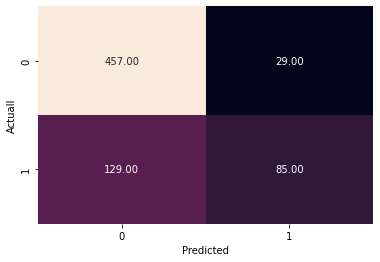

In [56]:
sns.heatmap(confusion_matrix(train_labels, ytrain_predict),annot=True,fmt='.2f',cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actuall')

Text(33.0, 0.5, 'Actuall')

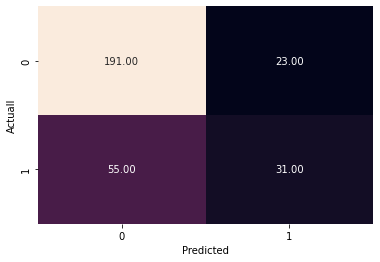

In [58]:
sns.heatmap(confusion_matrix(test_labels, ytest_predict),annot=True,cbar=False,fmt='.2f')
plt.xlabel('Predicted')
plt.ylabel('Actuall')

In [35]:
reg_dt_model.score(X_train,train_labels)

0.7742857142857142

In [36]:
reg_dt_model.score(X_test,test_labels)

0.74